In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles 

In [ ]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                        cov = 0.1,
                        n_samples=N,
                        n_features=2,
                        n_classes=2,
                        shuffle=True,
                        random_state=None)

X, Y= gaussian_quantiles


In [ ]:
Y = Y[:, np.newaxis]

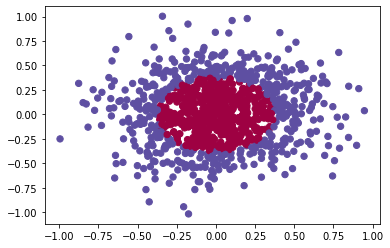

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

Funciones de activacion

In [ ]:
def sigmoid(x, derivate = False):
    if derivate:
      return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
      return 1/(1+np.exp(-x))
  
def relu(x, derivate=False):
  if derivate:
    x[x<=0]=0
    x[x>0]=1
    return x
  else:
    return np.maximum(0,x)

Funciñon de pérdida

In [ ]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat-y)**2) 

In [ ]:
def initialize_parameters_deep(layers_dim):
  parameters = {}
  L = len (layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],layers_dim[l+1]) * 2) -1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]) * 2) -1
  return parameters

In [ ]:
layers_dim = [2,4,8,1]
params = initialize_parameters_deep(layers_dim)

In [ ]:
params

{'W1': array([[ 0.25414867,  0.1860752 , -0.66632125,  0.95997512],
        [-0.36482752, -0.96813306,  0.64117518,  0.18259368]]),
 'b1': array([[ 0.13340876, -0.04535747,  0.43823897, -0.74296482]]),
 'W2': array([[ 0.15947939,  0.87636704, -0.48874319,  0.93225786, -0.57381919,
          0.95394724,  0.88121602, -0.32262156],
        [ 0.91114872,  0.83693914, -0.22770782, -0.55599514, -0.03224282,
          0.02470209, -0.82783236,  0.11943284],
        [-0.34171951, -0.14813889,  0.60947888, -0.29528216, -0.79588585,
          0.11677764,  0.86495009, -0.55769001],
        [-0.38173839,  0.86844541, -0.12360591,  0.5677161 ,  0.91882869,
         -0.39669129, -0.50629751,  0.37254782]]),
 'b2': array([[-0.0096451 , -0.31663623, -0.19297174, -0.16159517, -0.50173251,
         -0.96492851, -0.48648573,  0.53321812]]),
 'W3': array([[-0.26405366],
        [ 0.81479795],
        [ 0.5902803 ],
        [ 0.58548945],
        [-0.00845699],
        [-0.65618866],
        [ 0.10565932],


In [ ]:
params['W1'].shape

(2, 4)

In [ ]:
np.matmul(X, params['W1']).shape

(1000, 4)

In [ ]:
def train(x_data,lr,params,training=True):
#Fordward
  params['A0'] = x_data

  params['Z1'] = np.matmul(params['A0'], params['W1']) + params['b1']
  params['A1'] = relu(params['Z1'])

  params['Z2'] = np.matmul(params['A1'], params['W2']) + params['b2']
  params['A2'] = relu(params['Z2'])

  params['Z3'] = np.matmul(params['A2'], params['W3']) + params['b3']
  params['A3'] = sigmoid(params['Z3'])

  output = params['A3']

  #Backpropagation
  params['dZ3'] = mse(Y,output, True) * sigmoid(params['A3'], True)
  params['dW3'] = np.matmul(params['A2'].T, params['dZ3'])

  params['dZ2'] = np.matmul(params['dZ3'], params['W3'].T) * relu(params['A2'], True)
  params['dW2'] = np.matmul(params['A1'].T, params['dZ2'])

  params['dZ1'] = np.matmul(params['dZ2'], params['W2'].T) * relu(params['A1'], True)
  params['dW1'] = np.matmul(params['A0'].T, params['dZ1'])

  #Gradient descent
  params['W3'] = params['W3'] - params['dW3'] * lr 
  params['b3'] = params['b3'] - (np.means(params['Z3'], axis=0, kepdims=True)) * lr 

  params['W2'] = params['W2'] - params['dW2'] * lr 
  params['b2'] = params['b2'] - (np.means(params['Z2'], axis=0, kepdims=True)) * lr 

  params['W1'] = params['W1'] - params['dW1'] * lr 
  params['b1'] = params['b1'] - (np.means(params['Z1'], axis=0, kepdims=True)) * lr 

  return output

In [ ]:
output.shape

(1000, 1)